In [4]:
pip install pyheif pillow


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [7]:
base_dir = '/home/tia/Downloads/Gdrive/dataset'
screen_src = ''
non_screen_src = ''

In [8]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import random
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

def random_brightness_contrast(img):
    img = tf.image.random_brightness(img, max_delta=0.1)
    img = tf.image.random_contrast(img, lower=0.9, upper=1.1)
    return img


def preprocessing(img):
    img = random_grayscale(img)
    img = random_brightness_contrast(img)
    return img


def random_grayscale(img):
    if random.random() < 0.3:
        img = tf.image.rgb_to_grayscale(img)
        img = tf.image.grayscale_to_rgb(img)
    return img

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # preprocessing_function=random_grayscale,
    validation_split=0.2,
    preprocessing_function=preprocessing

)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = val_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 2336 images belonging to 2 classes.
Found 582 images belonging to 2 classes.


In [9]:


from tensorflow.keras import layers, models

from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)), # input layer learning edges and lines
    layers.MaxPooling2D(2, 2),#downsampling

    layers.Conv2D(64, (3, 3), activation='relu'), # 64 filters learning shapes and textures learning complex features
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'), # 128 filters learning more complex features bigger shapes more abstract details
    layers.MaxPooling2D(2, 2),

    # layers.Conv2D(256, (3, 3), activation='relu'),
    # layers.MaxPooling2D(2, 2),

    # layers.Conv2D(512, (3, 3), activation='relu'),
    # layers.MaxPooling2D(2, 2),

    layers.Flatten(), # making 2d to 1d vector to feed into dense layer


    layers.Dense(128, activation='relu'), #full connected layer
    layers.Dropout(0.5),#dropping 50% neurons to avoid overfitting

    # layers.Dense(256, activation='relu'), #same fully connected layer
    # layers.Dropout(0.5),#same dropping of 50% neurons

    layers.Dense(1, activation='sigmoid')
])


model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/home/tia/Desktop/personal/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# #vgg transfer learning
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing import image_dataset_from_directory






# base_model = VGG16(input_shape=(224, 224, 3),
#                    include_top=False,
#                    weights='imagenet')

# base_model.trainable = False


# model = models.Sequential([
#     base_model,
#     layers.GlobalAveragePooling2D(),  
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(1, activation='sigmoid')
# ])


# model.compile(
#     optimizer=Adam(learning_rate=0.0001),
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )



In [15]:
pip install torch

  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.0/865.0 MB 1.0 MB/s eta 0:00:00:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 21.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 17.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 18.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 1.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.9 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [17]:
pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 17.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install pytorch_lightning

  Using cached pytorch_lightning-2.5.1.post0-py3-none-any.whl.metadata (20 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached PyYAML-6.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached torchmetrics-1.7.1-py3-none-any.whl.metadata (21 kB)
  Using cached lightning_utilities-0.14.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached aiohttp-3.11.18-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.7 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.3.2-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached frozenlist-1.6.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (16 kB)
  Using cached multidict-6.4.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.3 kB)
  Using cached propcache-0.3.1-cp312-cp312

In [23]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.models import efficientnet_b0
from torch.utils.data import DataLoader, random_split

import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping

# Data transforms
transform = transforms.Compose([
    tranforms.
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Dataset and loaders
dataset = ImageFolder(root='/home/tia/Downloads/Gdrive/dataset', transform=transform)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Lightning Module
class EfficientNetBinaryClassifier(pl.LightningModule):
    def __init__(self, learning_rate=1e-4):
        super().__init__()
        self.model = efficientnet_b0(pretrained=True)
        for param in self.model.features.parameters():
            param.requires_grad = False

        self.model.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(self.model.classifier[1].in_features, 1),
        )
        self.loss_fn = nn.BCEWithLogitsLoss()
        self.learning_rate = learning_rate

    def forward(self, x):
        return self.model(x).squeeze(1)  # shape (batch,) instead of (batch,1)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y = y.float()  # ensure it's float for BCEWithLogits
        logits = self(x)
        loss = self.loss_fn(logits, y)
        acc = ((torch.sigmoid(logits) > 0.5) == y).float().mean()
        self.log('train_loss', loss, prog_bar=True)
        self.log('train_acc', acc, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y = y.float()
        logits = self(x)
        loss = self.loss_fn(logits, y)
        acc = ((torch.sigmoid(logits) > 0.5) == y).float().mean()
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.learning_rate)


# Train
model = EfficientNetBinaryClassifier()

trainer = pl.Trainer(
    max_epochs=50,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
    accelerator='auto'  # Uses GPU if available
)

trainer.fit(model, train_loader, val_loader)


/home/tia/Desktop/personal/myenv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/tia/Desktop/personal/myenv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
3.1%

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /home/tia/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100.0%
Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name    | Type              | Params | Mode 
------------------------------------------------------
0 | model   | EfficientNet      | 4.0 M  | train
1 | loss_fn | BCEWithLogitsLoss | 0      | train
------------------------------------------------------
1.3 K     Trainable params
4.0 M     Non-trainable params
4.0 M     Total params
16.035    Total estimated model params size (MB)
338       Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/tia/Desktop/personal/myenv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


/home/tia/Desktop/personal/myenv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 49: 100%|██████████| 73/73 [05:49<00:00,  0.21it/s, v_num=0, train_loss=0.160, train_acc=0.967, val_loss=0.286, val_acc=0.892]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 73/73 [05:49<00:00,  0.21it/s, v_num=0, train_loss=0.160, train_acc=0.967, val_loss=0.286, val_acc=0.892]


In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Put model in evaluation mode
model.eval()

all_preds = []
all_labels = []

# Use DataLoader to go through validation set
for batch in val_loader:
    x, y = batch
    with torch.no_grad():
        logits = model(x.to(model.device))
        preds = (torch.sigmoid(logits) > 0.5).int().cpu().numpy()
        all_preds.extend(preds.flatten())
        all_labels.extend(y.cpu().numpy())

# Compute Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:\n", cm)

# Optional: Classification Report
print("Classification Report:\n", classification_report(all_labels, all_preds))


Confusion Matrix:
 [[226  44]
 [ 19 295]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       270
           1       0.87      0.94      0.90       314

    accuracy                           0.89       584
   macro avg       0.90      0.89      0.89       584
weighted avg       0.89      0.89      0.89       584



In [1]:
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import CSVLogger
logger = CSVLogger("logs", name="my_exp_name")
trainer = Trainer(logger=logger)

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)


In [12]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_data.classes),
    y=train_data.classes
)

class_weights = dict(enumerate(class_weights))

In [13]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stopping],
    verbose=1,
    class_weight = class_weights



)

/home/tia/Desktop/personal/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


2025-05-06 10:30:34.160536: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2025-05-06 10:30:34.408685: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2025-05-06 10:30:35.546941: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2025-05-06 10:30:35.669634: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.
2025-05-06 10:30:36.100607: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5322 - loss: 0.7579

KeyboardInterrupt: 

In [ ]:
pip install matplotlib


  Using cached matplotlib-3.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 1.0 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
Using cached matplotlib-3.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 2.5 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 4.8 MB/s eta 0:00:0000:0100:01
Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


NameError: name 'history' is not defined

In [ ]:
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {val_accuracy:.2f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8537 - loss: 0.3365
Validation Accuracy: 0.84


19/19 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step


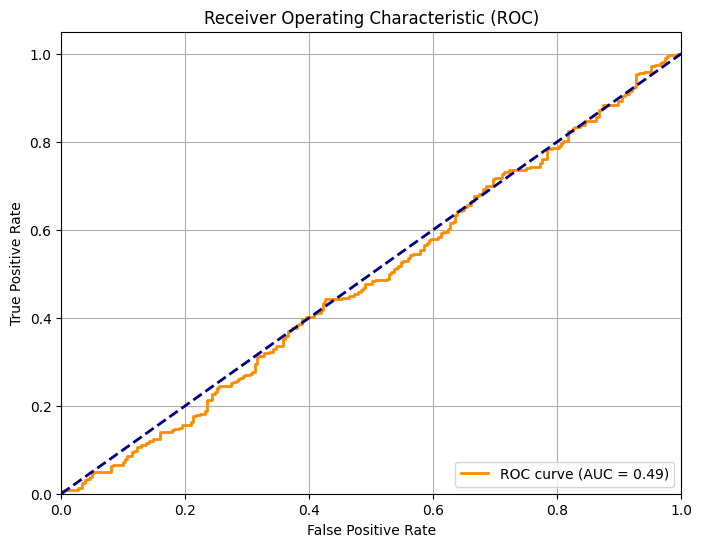

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np


y_pred_probs = model.predict(val_data)

y_true = val_data.classes


fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

val_data.reset()
y_true = val_data.classes
y_pred_probs = model.predict(val_data)
y_pred = (y_pred_probs > 0.52).astype(int).reshape(-1)

cm = confusion_matrix(y_true, y_pred)
cr = classification_report(y_true, y_pred, target_names=['non_screen', 'screen'])

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)


19/19 ━━━━━━━━━━━━━━━━━━━━ 127s 7s/step
Confusion Matrix:
[[128 135]
 [139 180]]

Classification Report:
              precision    recall  f1-score   support

  non_screen       0.48      0.49      0.48       263
      screen       0.57      0.56      0.57       319

    accuracy                           0.53       582
   macro avg       0.53      0.53      0.53       582
weighted avg       0.53      0.53      0.53       582

